# Using Python and PyTorch to implement linear regression using gradient decent based. 

In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Creating the dataset according to given instructions

dataset = make_regression(n_samples=500, n_features=3, random_state=10)

In [3]:
## Extracting features and labels from dataset

X = dataset[0]
y = dataset[1]

In [4]:
## Having a look at our dataset

pd.DataFrame(X).head()

,0,1,2
0,1.862952,0.073283,1.173732
1,1.379338,0.806391,0.749548
2,2.394704,0.842225,0.203581
3,0.149455,-0.287584,0.846675
4,0.430651,-2.376758,-1.176299


In [5]:
## Splitting the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [6]:
print(f'Shape of Training Data, Features: {X_train.shape}; Labels {y_train.shape}')
print(f'Shape of Test Data, Features: {X_test.shape}; Labels {y_test.shape}')

Shape of Training Data, Features: (300, 3); Labels (300,)
Shape of Test Data, Features: (200, 3); Labels (200,)


## Implementation using Python

In [14]:
## Defining a class for our linear regression with custom hypothesis

class LinearRegression:

    #Constructor
    def __init__(self):
        
        n           = 4
        self.theta  = np.zeros(n)
     
    
    #Method for training
    def fit(self, X, y, learning_rate, epochs):

        loss_history = []

        for epoch in range(epochs):           
                
            # Forward pass
            h_x = self._forward(X)

            # Computing Loss
            loss = self._compute_loss(h_x, y)

            # Backward Pass
            grads = self._backward(h_x, y, X)

            # Updating params
            self._update_params(grads, learning_rate)

            # Storing loss history
            loss_history.append(loss)

            # Print satement for verbosity
            print(f'Epoch: {epoch}, Loss: {loss}')


        return loss_history
         

    #Method for prediction
    def predict(self, x):

        return self._forward(x)

    ####----------------------PRIVATE METHODS----------------------####
    
    def _forward(self, x):

        h_x =   self.theta[1] * x[:, 0]**2 * 3              + \
                self.theta[2] * x[:, 1]**3                  - \
                self.theta[3] * x[:, 1]**3                  + \
                self.theta[2] * x[:, 2]**3 * self.theta[3]  + \
                self.theta[0]
        
        return h_x

    def _backward(self, h_x, y, X):

        m     = len(X)        
        grads = np.zeros(self.theta.shape)
        error = h_x - y         

        grads[0] = (error).sum() / m
        grads[1] = (error *  X[:, 0]**2 * 3).sum() / m
        grads[2] = (error *  X[:, 1]**3 + self.theta[3] * X[:, 2]**3).sum() / m
        grads[3] = (error * -X[:, 1]**3 + self.theta[2] * X[:, 2]**3).sum() / m

        return grads

    def _update_params(self, grads, learning_rate):

        self.theta -= learning_rate * grads
        

    def _compute_loss(self, h_x, y):

        m    =  len(h_x)
        loss = ((h_x - y)**2).sum() / (2 * m) 

        return loss

In [51]:
## Creating the model and defining variables for its training

model = LinearRegression()

learning_rate = 0.001
epochs        = 5

In [52]:
## Training the Model

loss_hist = model.fit(X_train, y_train, learning_rate, epochs)

Epoch: 0, Loss: 6109.495980692822
Epoch: 1, Loss: 6094.374938989847
Epoch: 2, Loss: 6083.584296132705
Epoch: 3, Loss: 6076.859091279902
Epoch: 4, Loss: 6073.95636196121


In [53]:
## Predicting on Test set 

preds = model.predict(X_test)

In [54]:
## Calculating Mean Squared Error

test_mse = mean_squared_error(y_test, preds)

In [55]:
print(f'The Mean Squared Error on Test Set for the Linear Regression implemented in Python is {test_mse:.2f}')

The Mean Squared Error on Test Set for the Linear Regression implemented in Python is 10977.31


Text(0, 0.5, 'Mean Squared Error')

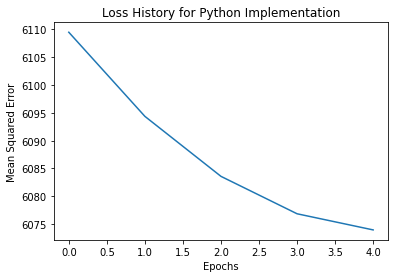

In [56]:
plt.plot(loss_hist)

plt.title("Loss History for Python Implementation")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")

## Implenting using PyTorch

In [27]:
import torch
import torch.nn as nn
import numpy as np
from torch.autograd import Variable

In [28]:
## Defining Custom PyTorch Layer which will implement hypothesis given in the question

class Hypothesis(nn.Module):
    """
    Custom PyTorch layer that implements the hypothesis given in question
    """

    # Constructor
    def __init__(self):
        
        # Defining variables required by PyTorch to perform computations
        super().__init__()
        self.size    = 3
        weights      = torch.Tensor(self.size)
        self.weights = nn.Parameter(weights)
        
        bias         = torch.Tensor(1)
        self.bias    = nn.Parameter(bias)

        torch.nn.init.zeros_(self.weights)
        torch.nn.init.zeros_(self.bias)
        

    # Forward Pass
    def forward(self, x):

        h_x =   self.weights[0] * x[:, 0]**2 * 3                + \
                self.weights[1] * x[:, 1]**3                    - \
                self.weights[2] * x[:, 1]**3                    + \
                self.weights[1] * x[:, 2]**3 * self.weights[2]  + \
                self.bias
        
        return h_x

In [29]:
## class for Linear Regression that uses our custom Hypothesis layer

class LinearRegression2(nn.Module):

    def __init__(self):
        super().__init__()
        self.hypothesis = Hypothesis()

    def forward(self, x):
        out = self.hypothesis(x)
        return out

In [30]:
model2 = LinearRegression2()

learning_rate = 0.001
epochs        = 5

In [31]:
criterion = nn.MSELoss() 
optimizer = torch.optim.SGD(model2.parameters(), lr=learning_rate)

In [32]:
loss_hist2 = []

for epoch in range(epochs):

    inputs = Variable(torch.from_numpy(X_train))
    labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we dont want to cummulate gradients
    optimizer.zero_grad()

    # Performing Forward pass
    outputs = model2(inputs)

    # Calculting the loss
    loss = criterion(outputs, labels)

    # Performing Backward pass
    loss.backward()

    # Updating Parameters
    optimizer.step()

    # Storing loss history
    loss_hist2.append(loss)


    print('epoch: {}, loss: {}'.format(epoch, loss.item()))

epoch: 0, loss: 12218.991961385644
epoch: 1, loss: 12166.7558174311
epoch: 2, loss: 12151.382718945562
epoch: 3, loss: 12145.149608180453
epoch: 4, loss: 12141.317415624646


In [33]:
## Predicting on Test set 

inputs = Variable(torch.from_numpy(X_test))
preds2 = model2(inputs)

In [34]:
## Calculating Mean Squared Error on Test set

test_mse2 = mean_squared_error(y_test, preds2.detach().numpy())

In [35]:
print(f'The Mean Squared Error on Test Set for the Linear Regression implemented in PyTorch is {test_mse2:.2f}')

The Mean Squared Error on Test Set for the Linear Regression implemented in PyTorch is 10981.56


Text(0, 0.5, 'Mean Squared Error')

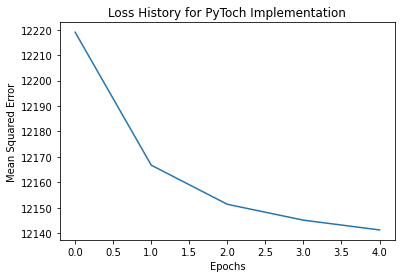

In [36]:
plt.plot(loss_hist2)

plt.title("Loss History for PyToch Implementation")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")